In [1]:
# !pip install pytesseract
# !pip install Pillow

In [2]:
# https://stackoverflow.com/questions/46140485/tesseract-installation-in-windows

Processing image: video5_frame_1484.jpg


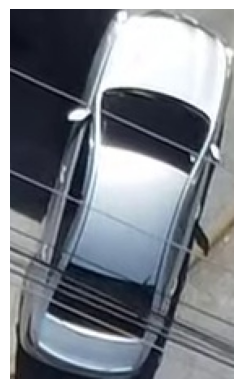

Text: 


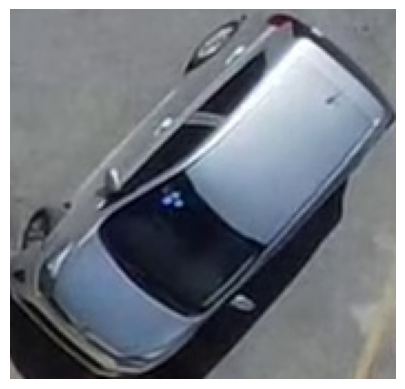

Text: 


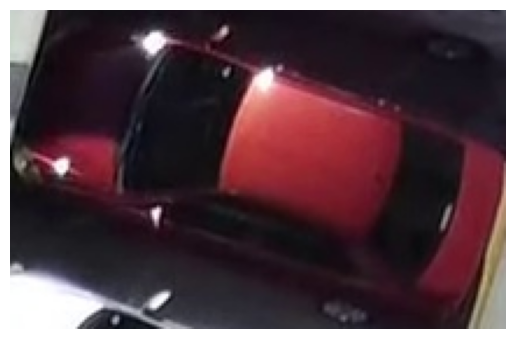

Text: on



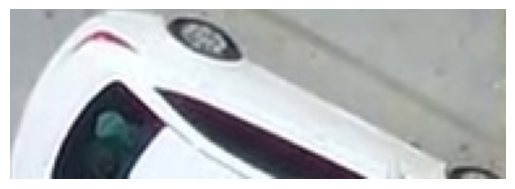

Text: J
/



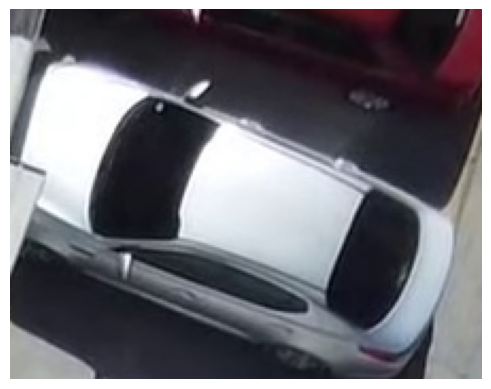

Text: 


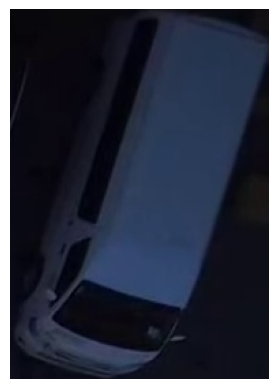

Text: 


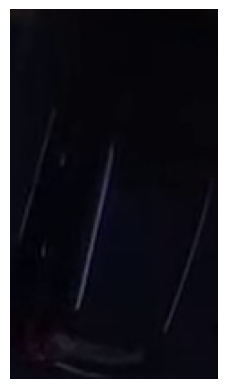

Text: 


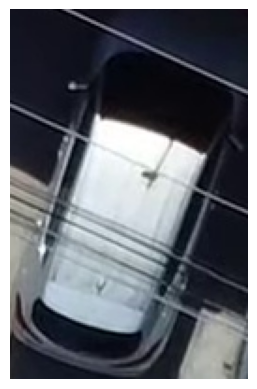

Text: 


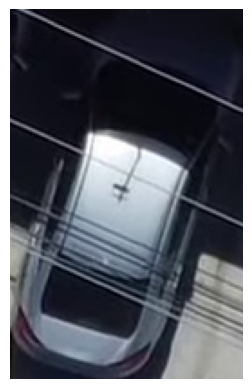

Text: 
Number plate: ['', '', 'on\n', 'J\n/\n', '', '', '', '', '']
Processing image: video5_frame_1484.jpg


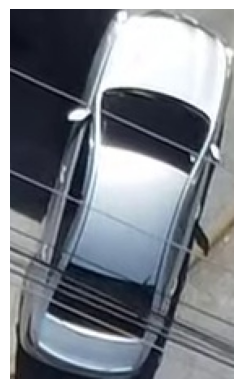

Text: 


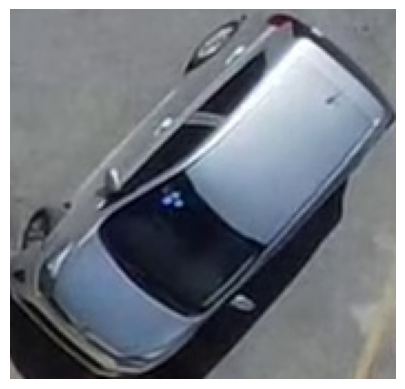

Text: 


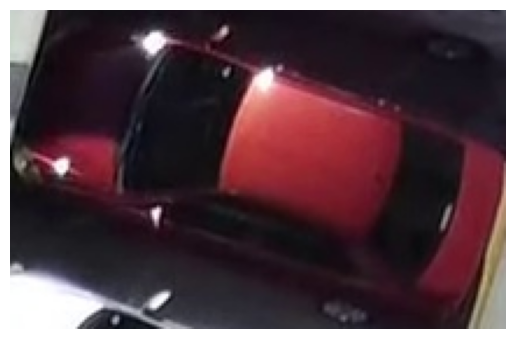

Text: on



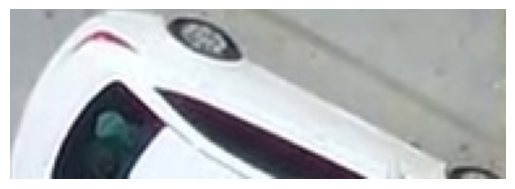

Text: J
/



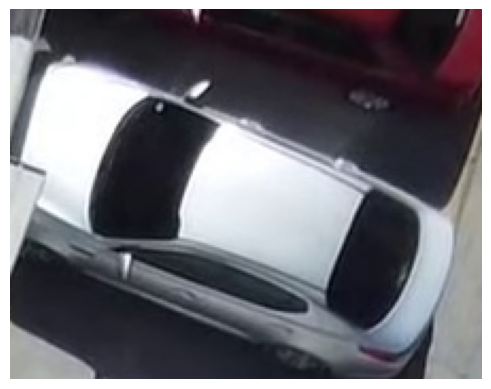

Text: 


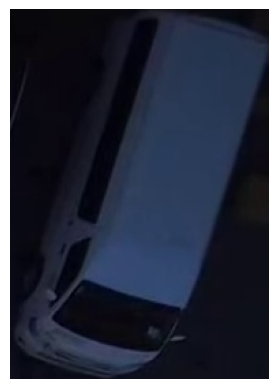

Text: 


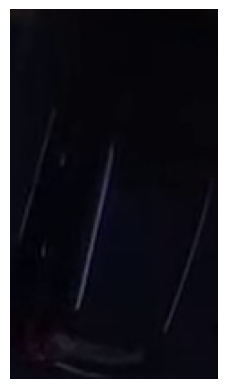

Text: 


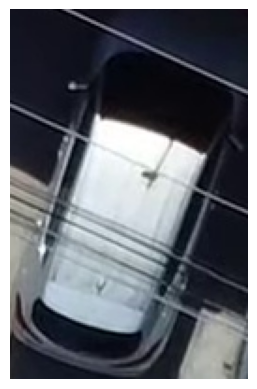

Text: 


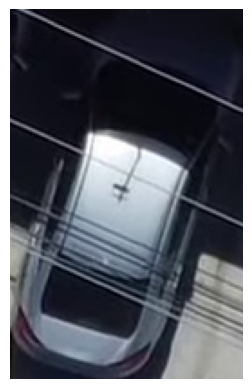

Text: 
Number plate: ['', '', 'on\n', 'J\n/\n', '', '', '', '', '']
Processing image: video5_frame_1484.jpg


KeyboardInterrupt: 

In [9]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Number plate detection
number_plate_path = 'license_plate_annotations.csv'

# Loading the number plater positions from the csv file
number_plate_positions = pd.read_csv(number_plate_path)

# Image path
image_path = 'frames/2160p'

# Extracting the number plate from the image
def extract_number_plate(image_path, number_plate_positions):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_name = image_path.split('/')[-1].split('\\')[-1]
    # Extracting number plate position details from the csv file
    number_plate_position = number_plate_positions[number_plate_positions['ImageName'] == image_name]

    # Initializing the number plates
    number_plates = []

    # Extracting the number plate from the image
    for i in range(len(number_plate_position)):
        x1 = number_plate_position['x'].values[i]
        y1 = number_plate_position['y'].values[i]
        x2 = number_plate_position['width'].values[i]
        y2 = number_plate_position['height'].values[i]

        number_plate = image[int(y1):int(y1+y2), int(x1):int(x1+x2)]
        number_plates.append(number_plate)
    return number_plates

# Extracting the text from the number plate
def extract_text_from_number_plate(number_plates):
    text = []
    # Iterating through the number plates
    for number_plate in number_plates:
        # Plotting the number plate
        plt.imshow(number_plate)
        plt.axis('off')
        plt.show()

        # Extracting the text from the number plate
        text.append(pytesseract.image_to_string(number_plate))
        print(f'Text: {text[-1]}')
    return text

# Extracting the number plate from the image
def extract_number_plate_from_image(image_path, number_plate_positions):
    number_plates = extract_number_plate(image_path, number_plate_positions)
    text = extract_text_from_number_plate(number_plates)
    return text

# Extracting the number plate from the image
for image_name in number_plate_positions['ImageName']:
    print(f'Processing image: {image_name}')
    image_path = os.path.join(image_path, image_name)
    text = extract_number_plate_from_image(image_path, number_plate_positions)
    print(f'Number plate: {text}')
    image_path = 'frames/2160p'
